<a href="https://colab.research.google.com/github/HykyungYoon/SlotGated-SLU/blob/master/data_science_0914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1) product type

In [2]:
import pandas as pd
import os, sys

paths = os.getcwd()
folder = '/content/drive/MyDrive/[2022-2] 수업/Data_Science'

retail ='Retail data.csv' 
industry ='Industry data.csv'

#product type
product_hier = 'Product Hierarchies.csv'
product_data = pd.read_csv(os.path.join(paths, folder, product_hier))
print(product_data.head())
print('Number of product : {} |  Number of item : {}'.format(len(product_data['Product Type'].unique()),len(product_data['Item'].unique())))
print('product type :', product_data['Product Type'].unique())
print('Item type :', product_data['Item'].unique())

'''
a = product_data.where(product_data['Product Type'] =='Grocery')
print(a)
'''



  Product Type           Item
0  Electronics     Power Cord
1  Electronics  Phone Charger
2  Electronics       Ear Buds
3  Electronics          Mouse
4  Electronics       Keyboard
Number of product : 3 |  Number of item : 18
product type : ['Electronics' 'Grocery' 'Home Goods']
Item type : ['Power Cord' 'Phone Charger' 'Ear Buds' 'Mouse' 'Keyboard' 'Milk' 'Eggs'
 'Cereal' 'Shrimp' 'Noodles' 'Steak' 'King Crab' 'Tape' 'Glue' 'Nails'
 'Bracket' 'Brush' 'Paint']


"\na = product_data.where(product_data['Product Type'] =='Grocery')\nprint(a)\n"

In [3]:
#make_label encoding
product_type_list = product_data['Product Type'].values.tolist()
item_list =  product_data['Item'].values.tolist()
new_label =[]
new_label_encoding = {}
for i in range(len(product_type_list)):
  label = str(product_type_list[i]+'_'+item_list[i])
  new_label.append(label)
  new_label_encoding[label] = i+1
print(new_label)
print(new_label_encoding)

['Electronics_Power Cord', 'Electronics_Phone Charger', 'Electronics_Ear Buds', 'Electronics_Mouse', 'Electronics_Keyboard', 'Grocery_Milk', 'Grocery_Eggs', 'Grocery_Cereal', 'Grocery_Shrimp', 'Grocery_Noodles', 'Grocery_Steak', 'Grocery_King Crab', 'Home Goods_Tape', 'Home Goods_Glue', 'Home Goods_Nails', 'Home Goods_Bracket', 'Home Goods_Brush', 'Home Goods_Paint']
{'Electronics_Power Cord': 1, 'Electronics_Phone Charger': 2, 'Electronics_Ear Buds': 3, 'Electronics_Mouse': 4, 'Electronics_Keyboard': 5, 'Grocery_Milk': 6, 'Grocery_Eggs': 7, 'Grocery_Cereal': 8, 'Grocery_Shrimp': 9, 'Grocery_Noodles': 10, 'Grocery_Steak': 11, 'Grocery_King Crab': 12, 'Home Goods_Tape': 13, 'Home Goods_Glue': 14, 'Home Goods_Nails': 15, 'Home Goods_Bracket': 16, 'Home Goods_Brush': 17, 'Home Goods_Paint': 18}


2) Retail data


In [4]:
import matplotlib.pyplot as plt

#retail data
retail_data = pd.read_csv(os.path.join(paths, folder, retail))
import numpy as np
for i in retail_data.columns :
    X_i = retail_data.loc[:,i].replace('-', np.nan) 
    print("column {} : {:.3f}% 결측치 비율".format(i,(1-X_i.dropna().shape[0]/retail_data.shape[0])*100))
    #print()


#check duplicate data
retail_data[retail_data.duplicated(keep=False)]

column Month : 0.000% 결측치 비율
column Sales Total : 0.000% 결측치 비율
column Store : 0.000% 결측치 비율
column Product Type : 0.000% 결측치 비율
column Item : 0.000% 결측치 비율


,Month,Sales Total,Store,Product Type,Item


In [5]:
number_of_store = retail_data['Store'].unique()
print('number_of_store : {}'.format(len(number_of_store)))

store_list = retail_data['Store'].values.tolist()


new_list =[]
for v in store_list:
  if v not in new_list:
    new_list.append(v)
  
print(new_list)

length_of_data_ = []
new_length_of_data={}
for i in range(len(new_list)):
  condition = retail_data['Store'] == new_list[i]
  length_of_data_.append(len(retail_data[condition]))
  new_length_of_data[new_list[i]] = len(retail_data[condition])

number_of_store : 617
[1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 

In [6]:
print('length of new_list :{} | length_of_data_ {}'.format(len(new_list), len(length_of_data_)))
#plt.pie(length_of_data_, counterclock=False)
#plt.axis('equal')
#plt.legend(length_of_data_)
#plt.show()

print('maximum length of data :{} | minimum length of data :{}'.format(max(new_length_of_data, key=new_length_of_data.get), min(new_length_of_data, key=new_length_of_data.get)))
print(new_length_of_data[465])
print(new_length_of_data[13])

length of new_list :617 | length_of_data_ 617
maximum length of data :465 | minimum length of data :13
937
1


In [7]:
for i in range(len(new_list)):
  condition = retail_data['Store'] == new_list[i]
  #print(retail_data[condition])
  item_sales={}
  item_list = retail_data[condition]['Item'].values.tolist()
  item_list = list(set(item_list))
  for j in range(len(item_list)):
    sales_dict = {}
    sales = retail_data[condition].loc[retail_data['Item']==item_list[j]]
    sales_dict[item_list[j]] = sales['Sales Total'].sum()
    item_sales.update(sales_dict)
  #print(new_list[i], item_sales)
 
  print('STORE : {} | maximum length of data :{} _ {} | minimum length of data :{} _ {}'.format(new_list[i],max(item_sales, key=item_sales.get), item_sales[max(item_sales, key=item_sales.get)], min(item_sales, key=item_sales.get), item_sales[min(item_sales, key=item_sales.get)]))


STORE : 1 | maximum length of data :Noodles _ 16 | minimum length of data :Glue _ 1
STORE : 2 | maximum length of data :Shrimp _ 10 | minimum length of data :Power Cord _ 0
STORE : 3 | maximum length of data :Noodles _ 21 | minimum length of data :Bracket _ 0
STORE : 4 | maximum length of data :Steak _ 11 | minimum length of data :Tape _ 0
STORE : 5 | maximum length of data :Shrimp _ 14 | minimum length of data :Paint _ 0
STORE : 6 | maximum length of data :Noodles _ 7 | minimum length of data :Nails _ 1
STORE : 7 | maximum length of data :Noodles _ 7 | minimum length of data :Glue _ 0
STORE : 9 | maximum length of data :Keyboard _ 43 | minimum length of data :Eggs _ 0
STORE : 10 | maximum length of data :Keyboard _ 5 | minimum length of data :King Crab _ 0
STORE : 12 | maximum length of data :Shrimp _ 127 | minimum length of data :Nails _ 1
STORE : 13 | maximum length of data :Keyboard _ 0 | minimum length of data :Keyboard _ 0
STORE : 14 | maximum length of data :Phone Charger _ 71 |

3) Industry data

In [8]:
#industry data
industry_data = pd.read_csv(os.path.join(paths, folder, industry))
print(industry_data.head())

                 Month  Industry Size  Store Product Type           Item
0  2015-01-01 00:00:00              2      1  Electronics       Keyboard
1  2015-01-01 00:00:00              1      1      Grocery          Steak
2  2015-01-01 00:00:00              1      1   Home Goods          Paint
3  2015-02-01 00:00:00              1      1      Grocery         Shrimp
4  2015-03-01 00:00:00              2      1  Electronics  Phone Charger


In [9]:
import numpy as np
for i in industry_data.columns :
    X_i = industry_data.loc[:,i].replace('-', np.nan) 
    print("column {} : {:.3f}% 결측치 비율".format(i,(1-X_i.dropna().shape[0]/industry_data.shape[0])*100))
    print()


column Month : 0.000% 결측치 비율

column Industry Size : 0.000% 결측치 비율

column Store : 0.000% 결측치 비율

column Product Type : 0.000% 결측치 비율

column Item : 0.000% 결측치 비율



In [10]:
print(industry_data.tail())


number_of_store = industry_data['Store'].unique()
print('number_of_store : {}'.format(len(number_of_store)))



industry_store_list = industry_data['Store'].values.tolist()
industry_new_list =[]
for v in industry_store_list:
  if v not in industry_new_list:
    industry_new_list.append(v)
  
print(industry_new_list)
#check duplicated data

industry_data[industry_data.duplicated(keep=False)]

                      Month  Industry Size  Store Product Type       Item
352889  2022-03-01 00:00:00              1    642      Grocery    Noodles
352890  2022-03-01 00:00:00              1    642      Grocery  King Crab
352891  2022-03-01 00:00:00              1    642   Home Goods       Glue
352892  2022-03-01 00:00:00              1    642   Home Goods      Nails
352893  2022-03-01 00:00:00              2    642   Home Goods    Bracket
number_of_store : 638
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 1

,Month,Industry Size,Store,Product Type,Item


In [11]:
industry_length_of_data_ = []
industry_new_length_of_data={}
for i in range(len(industry_new_list)):
  condition = industry_data['Store'] == industry_new_list[i]
  industry_length_of_data_.append(len(industry_data[condition]))
  industry_new_length_of_data[industry_new_list[i]] = len(industry_data[condition])


print('length of industry_new_list :{} | length_of_data_ {}'.format(len(industry_new_list), len(industry_length_of_data_)))
#plt.pie(length_of_data_, counterclock=False)
#plt.axis('equal')
#plt.legend(length_of_data_)
#plt.show()

print('maximum length of data :{} | minimum length of data :{}'.format(max(industry_new_length_of_data, key=industry_new_length_of_data.get), min(industry_new_length_of_data, key=industry_new_length_of_data.get)))
print(industry_new_length_of_data[338])
print(industry_new_length_of_data[621])

length of industry_new_list :638 | length_of_data_ 638
maximum length of data :338 | minimum length of data :621
1343
34


In [12]:
for i in range(len(industry_new_list)):
  condition = industry_data['Store'] == industry_new_list[i]
  #print(retail_data[condition])
  item_sales={}
  item_list = industry_data[condition]['Item'].values.tolist()
  item_list = list(set(item_list))
  for j in range(len(item_list)):
    sales_dict = {}
    sales = industry_data[condition].loc[industry_data['Item']==item_list[j]]
    sales_dict[item_list[j]] = sales['Industry Size'].sum()
    item_sales.update(sales_dict)
  #print(new_list[i], item_sales)
 
  print('STORE : {} | maximum length of data :{} _ {} | minimum length of data :{} _ {}'.format(industry_new_list[i],max(item_sales, key=item_sales.get), item_sales[max(item_sales, key=item_sales.get)], min(item_sales, key=item_sales.get), item_sales[min(item_sales, key=item_sales.get)]))


STORE : 1 | maximum length of data :Shrimp _ 257 | minimum length of data :Brush _ 7
STORE : 2 | maximum length of data :Shrimp _ 154 | minimum length of data :Milk _ 3
STORE : 3 | maximum length of data :Shrimp _ 892 | minimum length of data :Mouse _ 24
STORE : 4 | maximum length of data :Shrimp _ 549 | minimum length of data :Brush _ 4
STORE : 5 | maximum length of data :Shrimp _ 712 | minimum length of data :Paint _ 2
STORE : 6 | maximum length of data :Shrimp _ 246 | minimum length of data :Milk _ 6
STORE : 7 | maximum length of data :Noodles _ 216 | minimum length of data :Milk _ 6
STORE : 8 | maximum length of data :Phone Charger _ 150 | minimum length of data :Milk _ 1
STORE : 9 | maximum length of data :Keyboard _ 501 | minimum length of data :Tape _ 6
STORE : 10 | maximum length of data :Shrimp _ 179 | minimum length of data :Milk _ 3
STORE : 11 | maximum length of data :Keyboard _ 92 | minimum length of data :Cereal _ 2
STORE : 12 | maximum length of data :Noodles _ 609 | min

4) Dealer Hier

In [13]:
import numpy as np
dealer_hier = '/content/drive/MyDrive/[2022-2] 수업/Data_Science/Dealer Hierarchies.csv'
dealer_data = pd.read_csv(dealer_hier,encoding='cp949')

print(dealer_data.info())
dealer_data[dealer_data.duplicated(keep=False)]

print(dealer_data.columns)

for i in dealer_data.columns :
    X_i = dealer_data.loc[:,i].replace('-', np.nan) 
    print("column {} : {:.3f}% 결측치 비율".format(i,(1-X_i.dropna().shape[0]/dealer_data.shape[0])*100))
    #print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store           642 non-null    int64 
 1   Store Owner     642 non-null    int64 
 2   Region Level 1  642 non-null    object
 3   Region Level 2  642 non-null    object
 4   Urban/Rural     642 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.2+ KB
None
Index(['Store', 'Store Owner', 'Region Level 1', 'Region Level 2',
       'Urban/Rural'],
      dtype='object')
column Store : 0.000% 결측치 비율
column Store Owner : 0.000% 결측치 비율
column Region Level 1 : 0.000% 결측치 비율
column Region Level 2 : 0.000% 결측치 비율
column Urban/Rural : 0.000% 결측치 비율


4) Dealer Hier

1.   Owner 별로 몇개의 store를 소유하고 있는지
2.   Store가 어느 지역에 위치하고 있는지 : Rural or Urban





Index(['Store', 'Store Owner', 'Region Level 1', 'Region Level 2',
       'Urban/Rural'],
      dtype='object')
Store Owner
1      8
2      2
3      1
4      6
5      1
      ..
297    1
298    1
299    1
300    1
301    1
Name: Store, Length: 301, dtype: int64
13 | 1


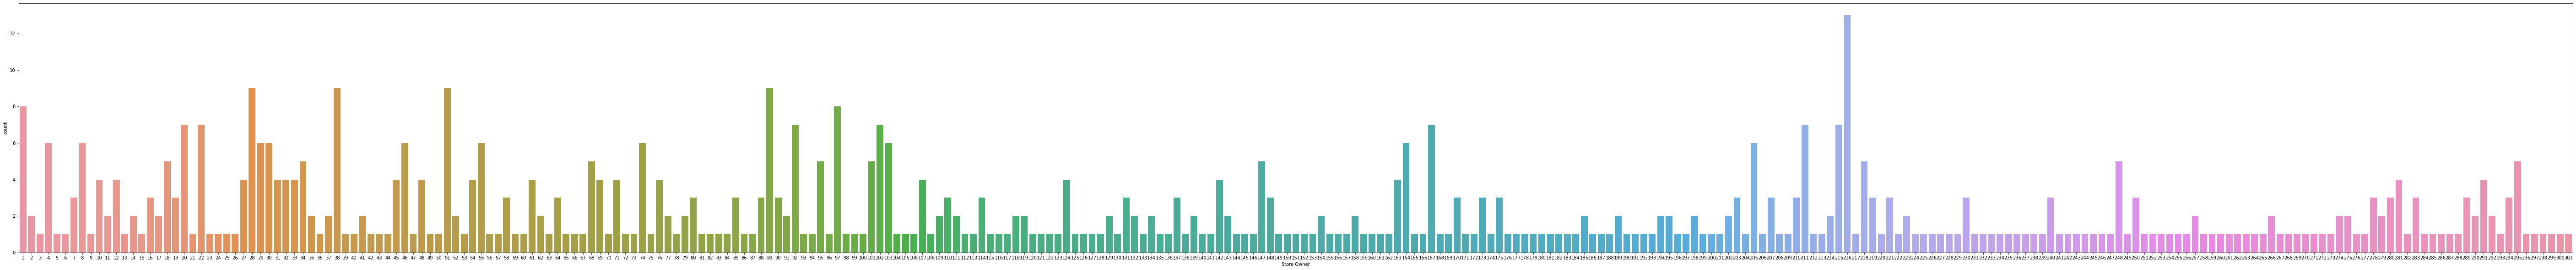

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
print(dealer_data.columns)
#for i in dealer_data.columns:
  #print(i, len(dealer_data[i].unique()))
  #print(dealer_data[i].unique(), len(dealer_data[i].unique()))

owner_by_store = dealer_data.groupby(['Store Owner'])['Store'].count()
print(owner_by_store)
print(owner_by_store.max(), '|', owner_by_store.min())
plt.figure(figsize=(100,10))
sns.countplot(x='Store Owner',data=dealer_data)

plt.savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/owner_by_store.png')
plt.show()


In [15]:
#print(dealer_data.info())
level_one_belong_to_level_two = dealer_data.groupby(['Region Level 1'])['Region Level 2']
level_two_belong_to_level_one = dealer_data.groupby(['Region Level 2'])['Region Level 1']
#print(level_one_belong_to_level_two.count())
#print(level_two_belong_to_level_one.count())



#number of city
#num_city = dealer_data['Region Level 1'].unique()
num_city = dealer_data['Region Level 1'].values.tolist()
print(len(set(num_city)))
#number of state
#num_state = dealer_data['Region Level 2'].unique()
num_state = dealer_data['Region Level 2'].values.tolist()
print(len(set(num_state)))

#number of cities in a state
city_and_state = {}
#for i in range(len(num_city)):
#    print(dealer_data['Region Level 2'].loc[dealer_data['Region Level 1']==num_city[i]])
from collections import defaultdict
state_have__city_info={}
for i in range(len(num_state)):
    state_have_city = dealer_data['Region Level 1'].loc[dealer_data['Region Level 2']==num_state[i]]
    city_and_state[num_state[i]]=len(set(state_have_city)) 
    state_have_city = list(set(state_have_city))
    #print(state_have_city)
    state_have__city_info.update({num_state[i]:state_have_city})
    #print(state_have__city_info)

print(city_and_state)
print(state_have__city_info)

343
61
{'GWR': 6, 'PUF': 5, 'MSD': 3, 'SQI': 9, 'OOO': 7, 'JHJ': 10, 'KWA': 3, 'QDA': 16, 'WPH': 11, 'FAC': 9, 'GCG': 5, 'KCF': 2, 'NSX': 10, 'TPV': 10, 'VSZ': 8, 'IRG': 6, 'TIG': 5, 'LAV': 14, 'NLG': 8, 'PPM': 4, 'JOP': 9, 'YIU': 17, 'QZN': 3, 'MEO': 3, 'ICA': 6, 'TZF': 19, 'LRJ': 8, 'TOH': 5, 'MDM': 2, 'WJO': 11, 'VFN': 4, 'WFJ': 5, 'IPP': 2, 'JLJ': 6, 'VIL': 3, 'UAY': 4, 'IYN': 4, 'MMJ': 6, 'DNJ': 2, 'SMM': 1, 'KTR': 11, 'IRA': 6, 'TIF': 4, 'EPM': 1, 'DNC': 1, 'APM': 2, 'NLX': 5, 'NGO': 9, 'DHA': 2, 'SKS': 6, 'RSL': 2, 'UIS': 1, 'JHR': 2, 'RUN': 3, 'AAR': 7, 'XEG': 2, 'UQM': 3, 'IKF': 1, 'CMH': 1, 'THH': 1, 'QQS': 2}
{'GWR': ['Politischer Bezirk Oberpullendorf', 'Eisenstadt-Umgebung', 'Politischer Bezirk Oberwart', 'Politischer Bezirk G?ssing', 'Lappeenranta', 'Politischer Bezirk Jennersdorf'], 'PUF': ['Politischer Bezirk Feldkirch', 'Yl?-Savo', '?lborg Kommune', 'Villach Stadt', 'Politischer Bezirk Bregenz'], 'MSD': ['Politischer Bezirk Hermagor', 'Kladno', 'Namur'], 'SQI': ['Pelh?

  state  number of city
0   GWR               6
1   PUF               5
2   MSD               3
3   SQI               9
4   OOO               7
Index(['state', 'number of city'], dtype='object')


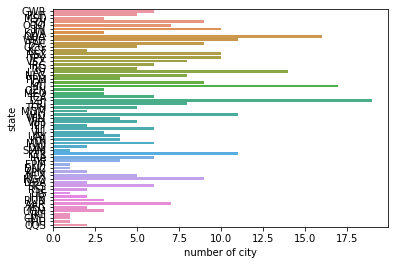

<Figure size 7200x7200 with 0 Axes>

In [16]:
keys = list(city_and_state.keys())
values = list(city_and_state.values())
data_ = pd.DataFrame({'state':keys, 'number of city':values})


print(data_.head())
print(data_.columns)
import seaborn as sns
sns.barplot(x='number of city', y='state', data=data_,orient='h')
sns.set(font_scale=0.4)
plt.figure(figsize=(100,100))
#plt.plot(keys, values)

plt.savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/state_and city.png')
plt.show()

지역별로 인기가 많았았던 품목 
1.   retail.csv 와 dealear hierarchies.csv 와 store의 지역정보 concatenate


In [17]:
#retail data 에서 항목별 correlation
print(retail_data['Month'].dtype)

retail_data['Month']=pd.to_datetime(retail_data['Month'])
retail_data['Year'] = retail_data['Month'].dt.year
retail_data['month'] = retail_data['Month'].dt.month
print(retail_data.head())
print(dealer_data.head())

object
       Month  Sales Total  Store Product Type           Item  Year  month
0 2021-02-01            1      1  Electronics  Phone Charger  2021      2
1 2021-02-01            5      1      Grocery         Shrimp  2021      2
2 2021-02-01            2      1      Grocery        Noodles  2021      2
3 2021-02-01            1      1      Grocery      King Crab  2021      2
4 2021-03-01            1      1  Electronics       Ear Buds  2021      3
   Store  Store Owner                     Region Level 1 Region Level 2  \
0      1            1                Eisenstadt-Umgebung            GWR   
1      2            1         Politischer Bezirk G?ssing            GWR   
2      3            1     Politischer Bezirk Jennersdorf            GWR   
3      4            1     Politischer Bezirk Jennersdorf            GWR   
4      5            1  Politischer Bezirk Oberpullendorf            GWR   

  Urban/Rural  
0       Urban  
1       Urban  
2       Urban  
3       Urban  
4       Urban  


In [18]:



for_retail_city =[]
for_retail_state = []
for_retail_urban_rural=[]
for i in range(len(retail_data['Store'])):
  store = retail_data.loc[i]['Store']
  for_retail_city.append(dealer_data.loc[store-1]['Region Level 1'])
  for_retail_state.append(dealer_data.loc[store-1]['Region Level 2'])
  for_retail_urban_rural.append(dealer_data.loc[store-1]['Urban/Rural'])



In [19]:
new_retail_data =pd.DataFrame({'Year':retail_data['Year'],
                               'Month':retail_data['month'],
                               'Sales Total': retail_data['Sales Total'],
                               'Store':retail_data['Store'],
                               'Product Type' : retail_data['Product Type'],
                               'Item':retail_data['Item'],
                               'Region Level 1':for_retail_city,
                               'Region_Lvel 2':for_retail_state,
                               'Urban/Rural':for_retail_urban_rural
                               })
print(new_retail_data.head())
new_retail_data.to_csv('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_retail_data.csv')

   Year  Month  Sales Total  Store Product Type           Item  \
0  2021      2            1      1  Electronics  Phone Charger   
1  2021      2            5      1      Grocery         Shrimp   
2  2021      2            2      1      Grocery        Noodles   
3  2021      2            1      1      Grocery      King Crab   
4  2021      3            1      1  Electronics       Ear Buds   

        Region Level 1 Region_Lvel 2 Urban/Rural  
0  Eisenstadt-Umgebung           GWR       Urban  
1  Eisenstadt-Umgebung           GWR       Urban  
2  Eisenstadt-Umgebung           GWR       Urban  
3  Eisenstadt-Umgebung           GWR       Urban  
4  Eisenstadt-Umgebung           GWR       Urban  


In [20]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<strong>MCA 분석</strong>
1. product type & Region Level 1
2. product type & Region Level 2

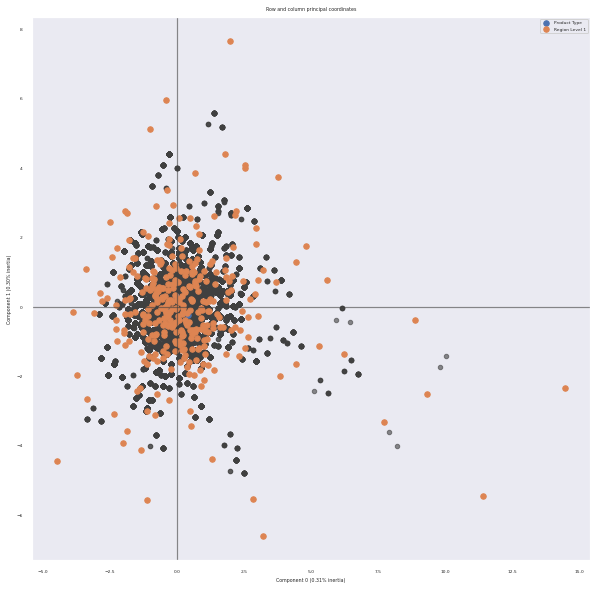

In [21]:
#Store, Product, Item, Region Level, 1 Region_Lvel 2, Urban/Rural  
import prince
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True, 
    check_input=True, 
    engine='auto',
    random_state=42
)
input_x = new_retail_data[['Product Type','Region Level 1']]
mca = mca.fit(input_x)
ax = mca.plot_coordinates(
     X=input_x,
     ax=None,
     figsize=(10, 10),
     show_row_points=True,
     row_points_size=20,
     show_row_labels=False,
     #row_groups=None,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
 )
ax.get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/mca_{}.png'.format('product_type_region_level_1'))

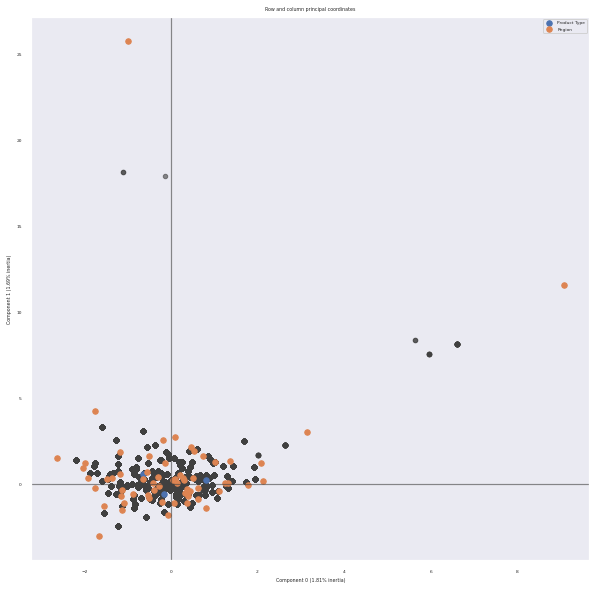

In [22]:
import prince

mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True, 
    check_input=True, 
    engine='auto',
    random_state=42
)
input_x = new_retail_data[['Product Type','Region_Lvel 2']]
mca = mca.fit(input_x)
ax = mca.plot_coordinates(
     X=input_x,
     ax=None,
     figsize=(10, 10),
     show_row_points=True,
     row_points_size=20,
     show_row_labels=False,
     #row_groups=None,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
 )
ax.get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/mca_{}.png'.format('product_type_region_level_2'))

<strong>년 & 월 별 판매 동향</strong>
* Product type
* Item


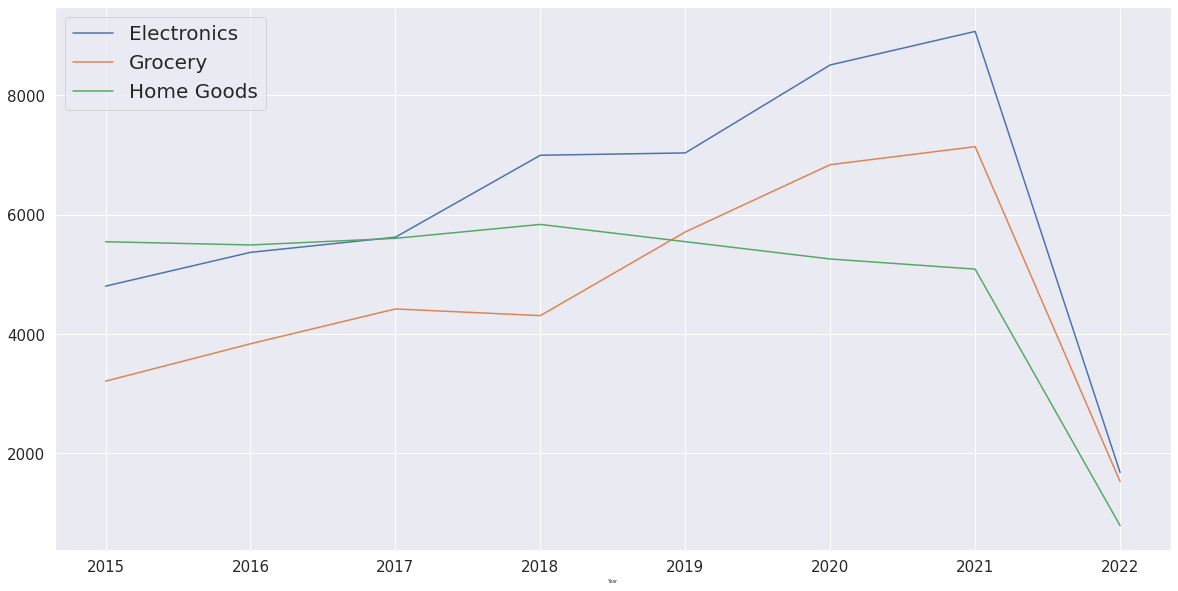

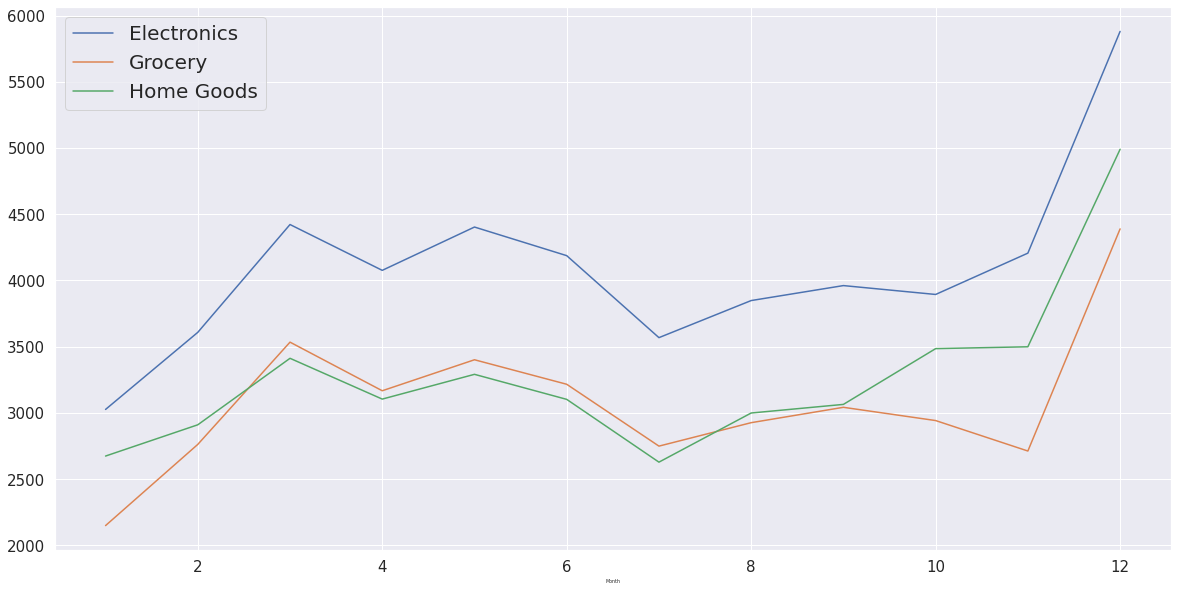

In [23]:
#new_retail_data.plot(figsize=(30,10))
ax=pd.crosstab(new_retail_data['Year'], new_retail_data['Product Type'])
ax.plot(figsize=(20,10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_retail_year_product.png')
plt.legend(fontsize = 20)

ay = pd.crosstab(new_retail_data['Month'], new_retail_data['Product Type'])
ay.plot(figsize=(20, 10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_retail_month_product.png')
plt.legend(fontsize = 20)

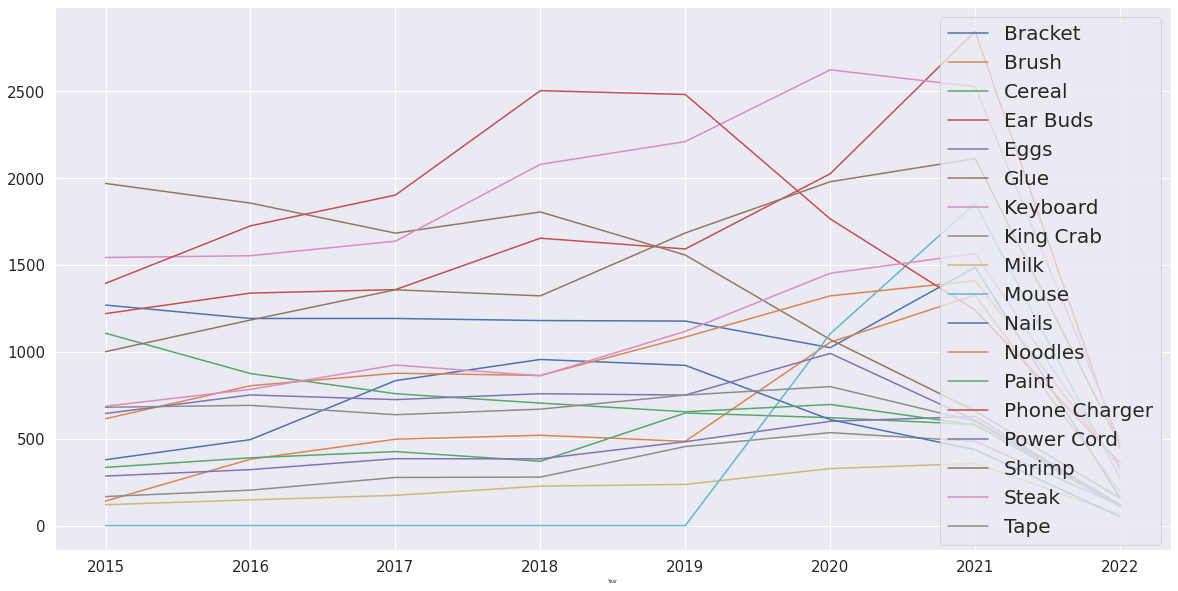

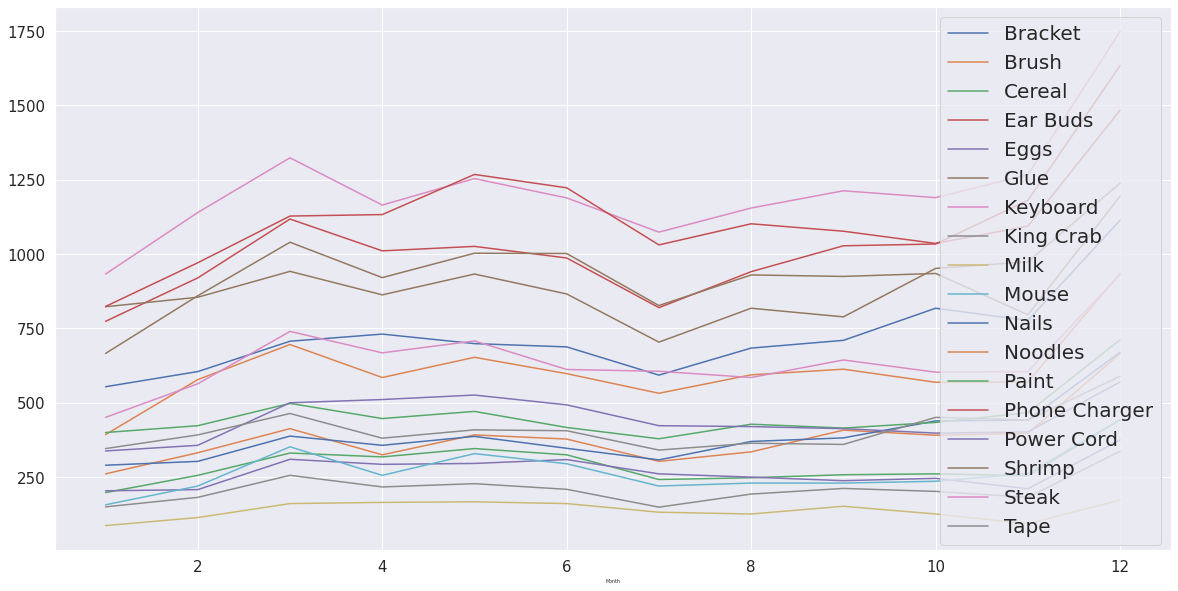

In [27]:
#new_retail_data.plot(figsize=(30,10))
ax=pd.crosstab(new_retail_data['Year'], new_retail_data['Item'])
ax.plot(figsize=(20,10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_retail_year_item.png')
plt.legend(fontsize = 20)

ay = pd.crosstab(new_retail_data['Month'], new_retail_data['Item'])
ay.plot(figsize=(20, 10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_retail_month_item.png')
plt.legend(fontsize = 20)

In [24]:
new_retail_data

,Year,Month,Sales Total,Store,Product Type,Item,Region Level 1,Region_Lvel 2,Urban/Rural
0,2021,2,1,1,Electronics,Phone Charger,Eisenstadt-Umgebung,GWR,Urban
1,2021,2,5,1,Grocery,Shrimp,Eisenstadt-Umgebung,GWR,Urban
2,2021,2,2,1,Grocery,Noodles,Eisenstadt-Umgebung,GWR,Urban
3,2021,2,1,1,Grocery,King Crab,Eisenstadt-Umgebung,GWR,Urban
4,2021,3,1,1,Electronics,Ear Buds,Eisenstadt-Umgebung,GWR,Urban
...,...,...,...,...,...,...,...,...,...
125221,2021,7,1,642,Electronics,Ear Buds,Koillismaa,KTR,Urban
125222,2021,8,0,642,Electronics,Power Cord,Koillismaa,KTR,Urban
125223,2021,9,0,642,Home Goods,Nails,Koillismaa,KTR,Urban
125224,2022,2,1,642,Electronics,Keyboard,Koillismaa,KTR,Urban


In [25]:
print(industry_data.head())


                 Month  Industry Size  Store Product Type           Item
0  2015-01-01 00:00:00              2      1  Electronics       Keyboard
1  2015-01-01 00:00:00              1      1      Grocery          Steak
2  2015-01-01 00:00:00              1      1   Home Goods          Paint
3  2015-02-01 00:00:00              1      1      Grocery         Shrimp
4  2015-03-01 00:00:00              2      1  Electronics  Phone Charger


In [29]:
#retail data 에서 항목별 correlation
print(industry_data['Month'].dtype)

industry_data['Month']=pd.to_datetime(industry_data['Month'])
industry_data['Year'] = industry_data['Month'].dt.year
industry_data['month'] = industry_data['Month'].dt.month
print(industry_data.head())


datetime64[ns]
       Month  Industry Size  Store Product Type           Item  Year  month
0 2015-01-01              2      1  Electronics       Keyboard  2015      1
1 2015-01-01              1      1      Grocery          Steak  2015      1
2 2015-01-01              1      1   Home Goods          Paint  2015      1
3 2015-02-01              1      1      Grocery         Shrimp  2015      2
4 2015-03-01              2      1  Electronics  Phone Charger  2015      3
       Month  Industry Size  Store Product Type           Item  Year  month
0 2015-01-01              2      1  Electronics       Keyboard  2015      1
1 2015-01-01              1      1      Grocery          Steak  2015      1
2 2015-01-01              1      1   Home Goods          Paint  2015      1
3 2015-02-01              1      1      Grocery         Shrimp  2015      2
4 2015-03-01              2      1  Electronics  Phone Charger  2015      3


In [33]:
for_industry_city =[]
for_industry_state = []
for_industry_urban_rural=[]
for i in range(len(industry_data['Store'])):
  store = industry_data.loc[i]['Store']
  for_industry_city.append(dealer_data.loc[store-1]['Region Level 1'])
  for_industry_state.append(dealer_data.loc[store-1]['Region Level 2'])
  for_industry_urban_rural.append(dealer_data.loc[store-1]['Urban/Rural'])
new_industry_data =pd.DataFrame({'Year':industry_data['Year'],
                               'Month':industry_data['month'],
                               'Sales Total': industry_data['Industry Size'],
                               'Store':industry_data['Store'],
                               'Product Type' : industry_data['Product Type'],
                               'Item':industry_data['Item'],
                               'Region Level 1':for_industry_city,
                               'Region_Lvel 2':for_industry_state,
                               'Urban/Rural':for_industry_urban_rural
                               })
print(new_industry_data.head())
new_industry_data.to_csv('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_industry_data.csv')

   Year  Month  Sales Total  Store Product Type           Item  \
0  2015      1            2      1  Electronics       Keyboard   
1  2015      1            1      1      Grocery          Steak   
2  2015      1            1      1   Home Goods          Paint   
3  2015      2            1      1      Grocery         Shrimp   
4  2015      3            2      1  Electronics  Phone Charger   

        Region Level 1 Region_Lvel 2 Urban/Rural  
0  Eisenstadt-Umgebung           GWR       Urban  
1  Eisenstadt-Umgebung           GWR       Urban  
2  Eisenstadt-Umgebung           GWR       Urban  
3  Eisenstadt-Umgebung           GWR       Urban  
4  Eisenstadt-Umgebung           GWR       Urban  


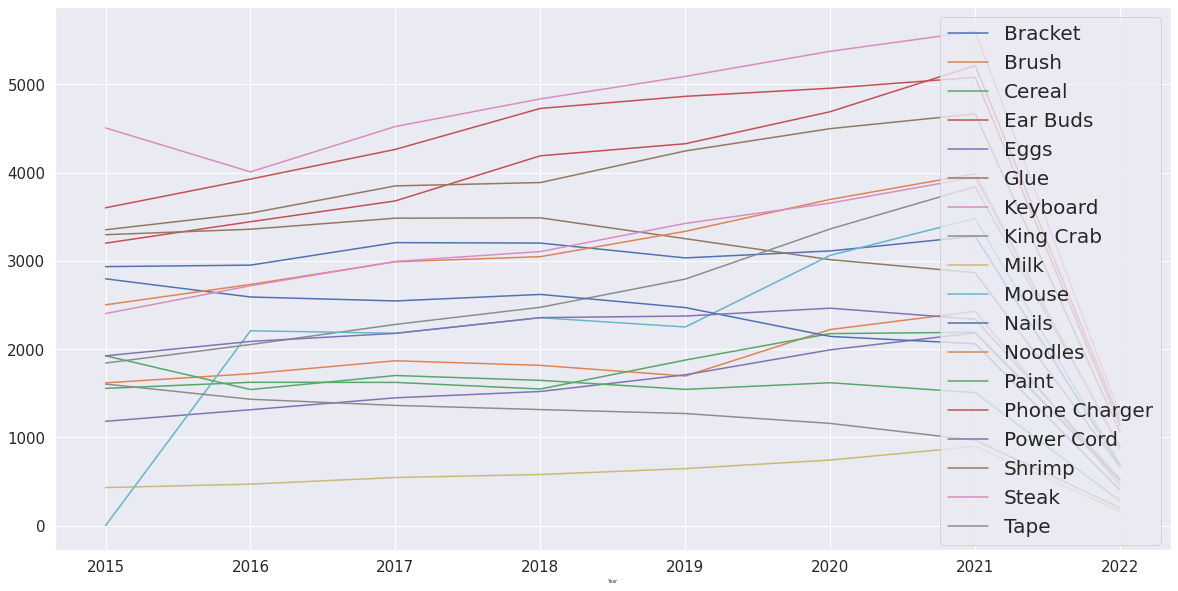

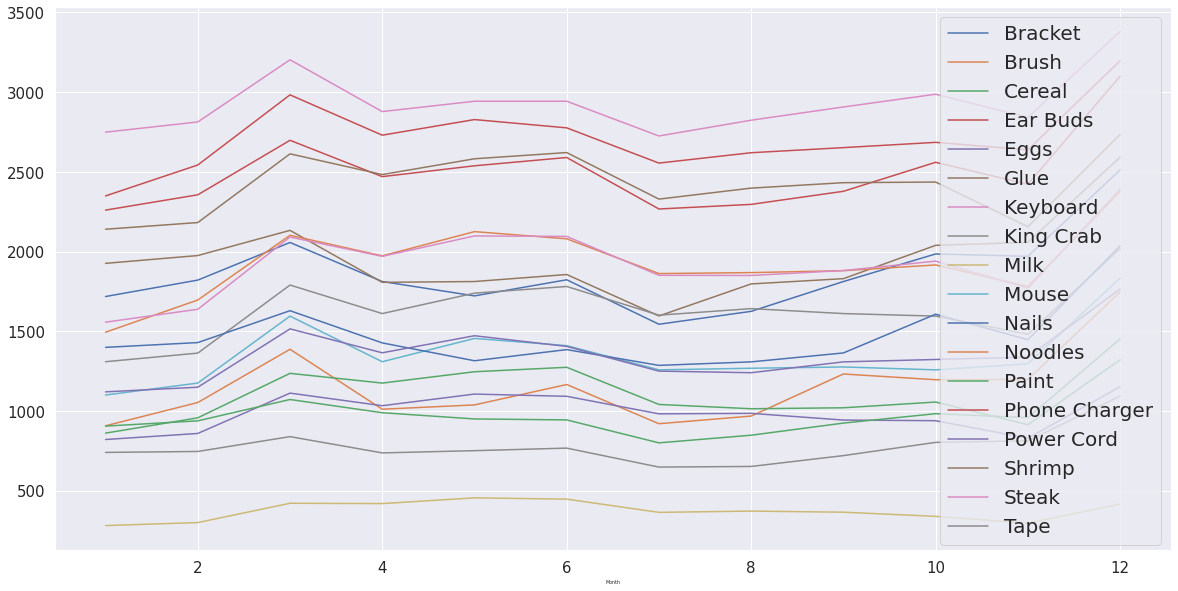

In [34]:
ax=pd.crosstab(new_industry_data['Year'], new_industry_data['Item'])
ax.plot(figsize=(20,10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_industry_year_item.png')
plt.legend(fontsize = 20)

ay = pd.crosstab(new_industry_data['Month'], new_industry_data['Item'])
ay.plot(figsize=(20, 10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_industry_month_item.png')
plt.legend(fontsize = 20)

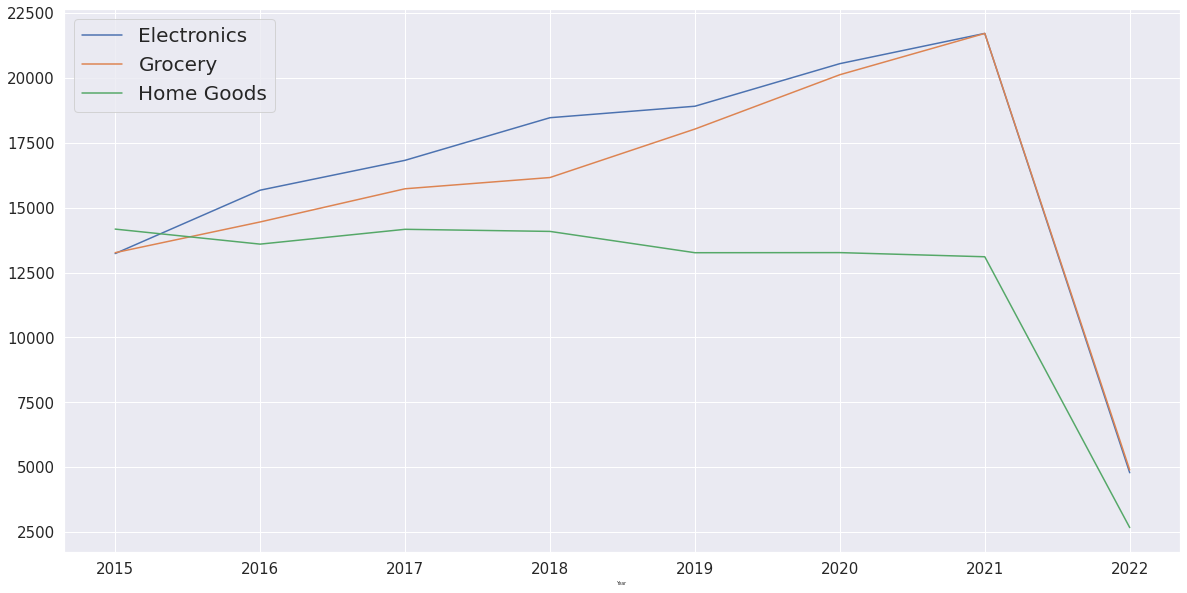

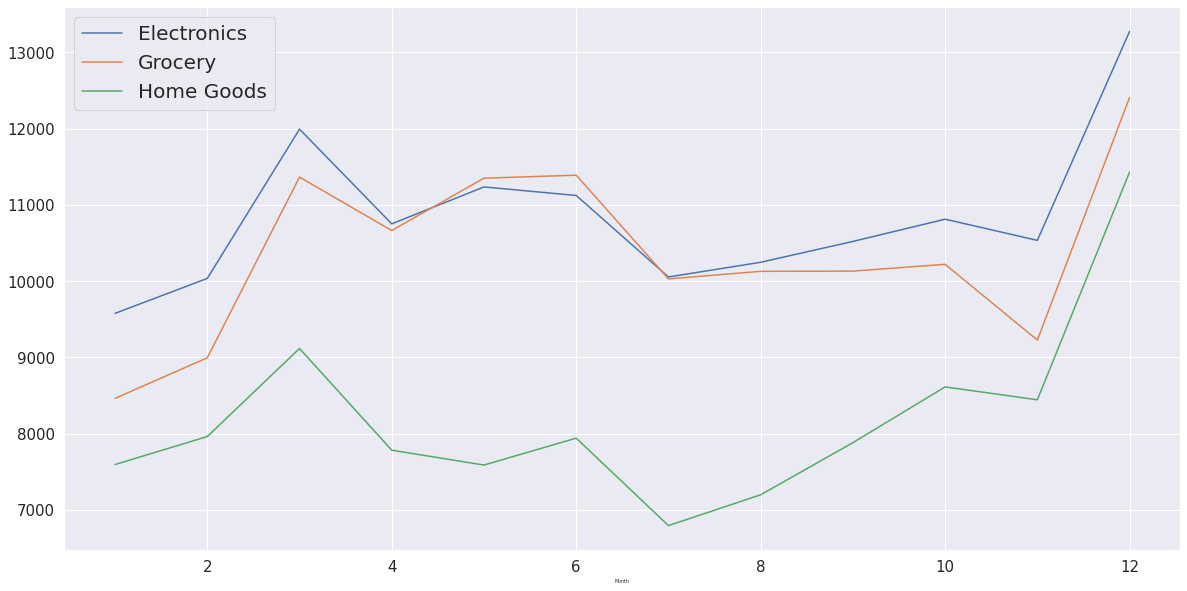

In [35]:
ax=pd.crosstab(new_industry_data['Year'], new_industry_data['Product Type'])
ax.plot(figsize=(20,10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_industry_year_product.png')
plt.legend(fontsize = 20)

ay = pd.crosstab(new_industry_data['Month'], new_industry_data['Product Type'])
ay.plot(figsize=(20, 10),fontsize=15).get_figure().savefig('/content/drive/MyDrive/[2022-2] 수업/Data_Science/new_industry_month_product.png')
plt.legend(fontsize = 20)